In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [2]:
target_df = pd.read_csv("Encoded_target.csv")
print("target:", target_df.shape)
# target_df.head()

features_df = pd.read_csv("EEG+phys_features.csv")
print("features:", features_df.shape)
# feature_df.head()

target: (1280, 4)
features: (1280, 371)


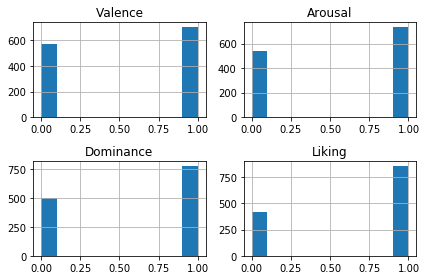

In [3]:
target_df.hist();
plt.tight_layout()

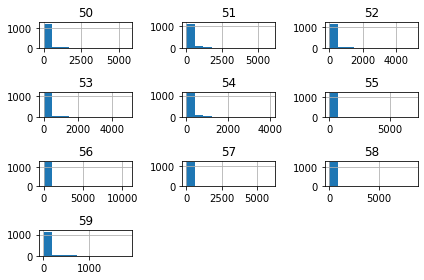

In [4]:
features_df.iloc[:, 50:60].hist();
plt.tight_layout()

In [8]:
scaler = MinMaxScaler(feature_range=(-1.0, 1.0))
scaler.fit(features_df.values)
features_scaled = scaler.transform(features_df.values)
features_scaled_df = pd.DataFrame(features_scaled, columns=features_df.columns)
# features_scaled_df.head()
print(features_scaled.min(), features_scaled.max())

-1.0000000000000002 1.0000000000000004


In [9]:
features_scaled_df.to_csv("preprocessed_features.csv", index=False)

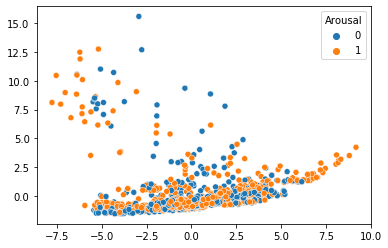

In [10]:
pca = PCA(n_components=2)
pca.fit(features_scaled)
features_pca = pca.transform(features_scaled)
sns.scatterplot(x=features_pca[:, 0], y=features_pca[:, 1], hue=target_df['Arousal'])

The optimal reduced dimension is 33


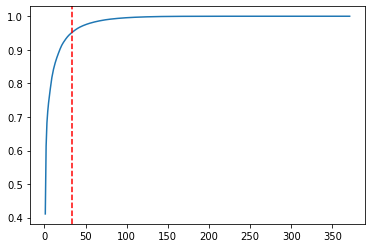

In [11]:
pca = PCA()
pca.fit(features_scaled)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print(f"The optimal reduced dimension is {d}")
plt.plot(range(1, cumsum.size + 1), cumsum);
plt.axvline(d, color='r', ls='--' );

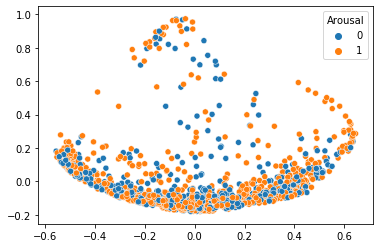

In [19]:
pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.01)
pca.fit(features_scaled)
features_pca = pca.transform(features_scaled)
sns.scatterplot(x=features_pca[:, 0], y=features_pca[:, 1], hue=target_df['Arousal'])

In [109]:
# clf = Pipeline([
#     ("kpca", KernelPCA(n_components=2)),
#     ("logreg", LogisticRegression())
# ])

# param_grid = [{
#     "kpca__gamma": np.linspace(0.00001, 0.09, 10),
#     "kpca__kernel": ["rbf", "sigmoid"]
# }]

# grid_search = GridSearchCV(clf, param_grid, cv=5, verbose=1)
# grid_search.fit(features_scaled, target_df['Arousal'])
# print(grid_search.best_params_)